# **Collecting Data**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/tmp/orange.zip'
shutil.copyfile(source, destination)

'/tmp/orange.zip'

In [ ]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# **Explore Data and Preprocessing**

In [ ]:
path = r'/tmp/orange/'
labels = os.listdir(path)
labels

['7', '1', '3', '12']

In [ ]:
#Check the number of images for each class and set
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 469 images in 7 days directory.
There are 72 images in 1 days directory.
There are 288 images in 3 days directory.
There are 741 images in 12 days directory.


In [ ]:
import os
from PIL import Image 
one_days = r'/tmp/orange/1/'
three_days = r'/tmp/orange/3/'
one_days_fnames = os.listdir(one_days)
three_days_fnames = os.listdir(three_days)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate= img.rotate(35).save(one_days+'rotated35'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate= img.rotate(80).save(one_days+'rotated70'+image)
            
for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(100).save(one_days+'rotated105'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(125).save(one_days+'rotated175'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(175).save(one_days+'rotated210'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(215).save(one_days+'rotated245'+image)

for image in one_days_fnames:
  img = Image.open(one_days+image)
  rotate_img= img.rotate(300).save(one_days+'rotated300'+image)

for image in three_days_fnames:  
  img = Image.open(three_days+image)
  rotate_img= img.rotate(270).save(three_days+'rotated270'+image)


In [ ]:
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 469 images in 7 days directory.
There are 576 images in 1 days directory.
There are 576 images in 3 days directory.
There are 741 images in 12 days directory.


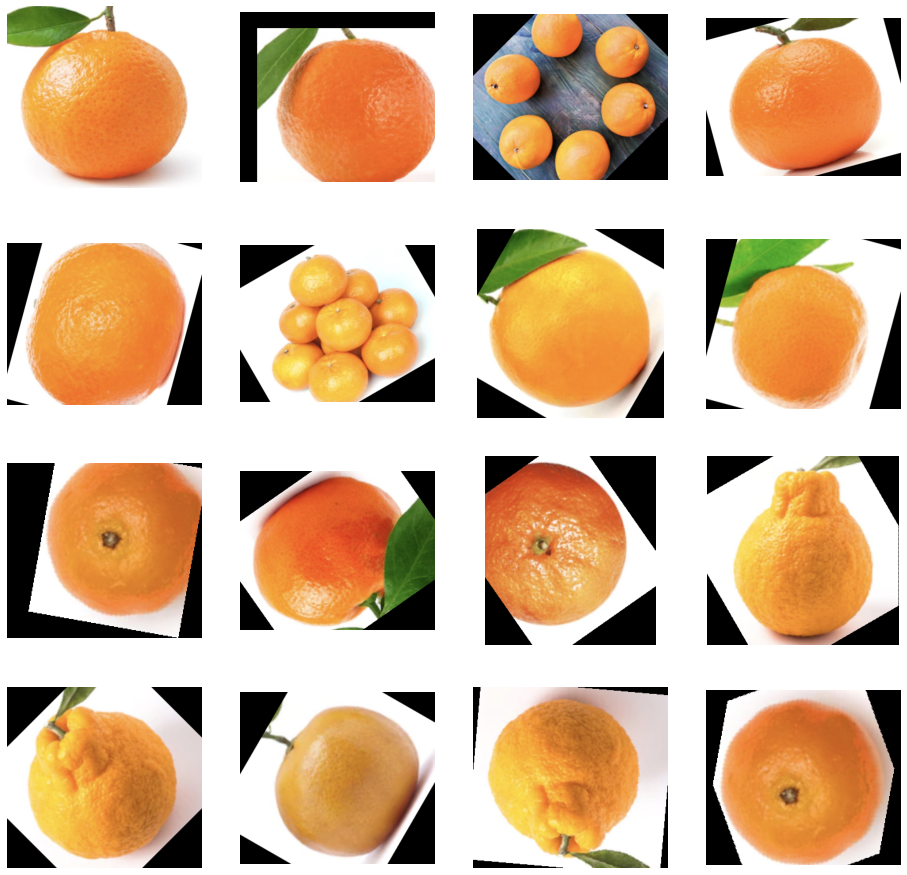

In [ ]:
#COBA

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_orange1_pix = [os.path.join('/tmp/orange/1/', fname) 
                for fname in os.listdir('/tmp/orange/1/')[ pic_index-8:pic_index] 
               ]
next_orange12_pix = [os.path.join('/tmp/orange/12/', fname) 
                for fname in os.listdir('/tmp/orange/12/')[ pic_index-8:pic_index] 
               ]
               
for i, img_path in enumerate(next_orange12_pix+next_orange1_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
#COBA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      validation_split=0.25)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.25)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),#rev mentoring
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1772 images belonging to 4 classes.
Found 590 images belonging to 4 classes.


# **Build model**

In [ ]:
#COBA2


  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(125, 125, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 61, 61, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [ ]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=80,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,earlystop,callbacks],
      verbose=1)

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 2.2158 - accuracy: 0.2844
Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to best_model.h5
20/20 [==============================] - 18s 333ms/step - loss: 2.2158 - accuracy: 0.2844 - val_loss: 1.3853 - val_accuracy: 0.3125
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.3860 - accuracy: 0.2984
Epoch 2: val_accuracy improved from 0.31250 to 0.36250, saving model to best_model.h5
20/20 [==============================] - 7s 327ms/step - loss: 1.3860 - accuracy: 0.2984 - val_loss: 1.3827 - val_accuracy: 0.3625
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.3828 - accuracy: 0.3048
Epoch 3: val_accuracy did not improve from 0.36250
20/20 [==============================] - 6s 304ms/step - loss: 1.3828 - accuracy: 0.3048 - val_loss: 1.3807 - val_accuracy: 0.3000
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 1.3817 - accuracy: 0.3032
Epoch 4: v

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

19/19 [==============================] - 5s 236ms/step - loss: 1.2572 - accuracy: 0.4864
Accuracy train:  0.3442437946796417
Accuracy test:  0.4864406883716583


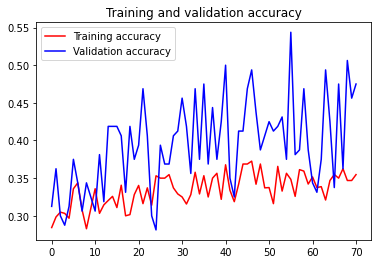

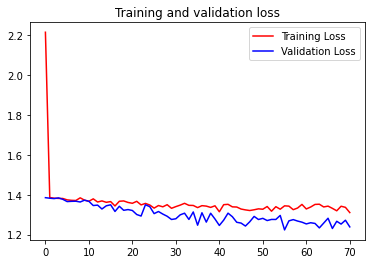

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Try test some images**

In [ ]:
#get index so we could know the order
train_generator.class_indices

{'1': 0, '12': 1, '3': 2, '7': 3}

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 
 #refer to our class indices
 #{'1': 0, '12': 1, '3': 2, '7': 3}
  if classes[0,0] == 1.0:
    print('1 more day')
  elif classes[0,1] == 1.0:
    print('12 more days')
  elif classes[0,2] == 1.0:
    print('3 more days')
  else:
    print('7 more days')

# **Export Model**
<hr>
You could choose type of format that you want to save, tflite or h5 or other. Below, we save it in tflite and h5. But if you want to deploy first on cloud, you can save it to h5.

In [ ]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\n Already saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 6500
drwxr-xr-x 2 root root    4096 May 10 11:39 assets
-rw-r--r-- 1 root root  974549 May 10 11:39 keras_metadata.pb
-rw-r--r-- 1 root root 5672303 May 10 11:39 saved_model.pb
drwxr-xr-x 2 root root    4096 May 10 11:39 variables


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path) # Intialize the TFLite converter to load the SavedModel
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_model = converter.convert()
tflite_model_file = 'Orange-resistance-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Orange-resistance-prediction.txt', 'w') as f:
    f.write('\n'.join(categories))

In [ ]:
try:
    files.download('Orange-resistance-prediction.tflite')
    files.download('Orange-resistance-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
saved_model_path = "./Orange-resistance-prediction.h5"
model.save(saved_model_path)